In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
Games_df = pd.read_csv('./Data/with_ratingvotes.csv')

# Display the first few rows
print(Games_df.head())

                         name    year  rating    votes  Action  Adventure  \
0                  Spider-Man  2018.0     9.2  20759.0    True       True   
1      Red Dead Redemption II  2018.0     9.7  35703.0    True       True   
2          Grand Theft Auto V  2013.0     9.5  59986.0    True      False   
3                  God of War  2018.0     9.6  26118.0    True       True   
4  Uncharted 4: A Thief's End  2016.0     9.5  28722.0    True       True   

   Comedy  Crime  Family  Fantasy  Mystery  Sci-Fi  Thriller  
0   False  False   False     True    False   False     False  
1   False   True   False    False    False   False     False  
2   False   True   False    False    False   False     False  
3   False  False   False    False    False   False     False  
4   False  False   False    False    False   False     False  


In [3]:
# Select features by removing name
features = Games_df.drop('name', axis=1)

In [4]:
# Convert boolean to intiger 
for column in features.columns:
    if features[column].dtype == bool:
        features[column] = features[column].astype(int)

print(features.dtypes)
features.head()

year         float64
rating       float64
votes        float64
Action         int32
Adventure      int32
Comedy         int32
Crime          int32
Family         int32
Fantasy        int32
Mystery        int32
Sci-Fi         int32
Thriller       int32
dtype: object


,year,rating,votes,Action,Adventure,Comedy,Crime,Family,Fantasy,Mystery,Sci-Fi,Thriller
0,2018.0,9.2,20759.0,1,1,0,0,0,1,0,0,0
1,2018.0,9.7,35703.0,1,1,0,1,0,0,0,0,0
2,2013.0,9.5,59986.0,1,0,0,1,0,0,0,0,0
3,2018.0,9.6,26118.0,1,1,0,0,0,0,0,0,0
4,2016.0,9.5,28722.0,1,1,0,0,0,0,0,0,0


In [5]:
# Normalize the data using Standard Scaler
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [6]:
# Since starting with a Kmeans (even though it might not be best for the dataset) and for that we use the "elbow methold" to find best number of clusters
inertia_values = []
num_clusters = list(range(1, 11))  
for num in num_clusters:
    kmeans_model = KMeans(n_clusters=num, random_state=1)
    kmeans_model.fit(features_scaled)
    inertia_values.append(kmeans_model.inertia_)

d:\Users\SeanPapworth\anaconda3\envs\PythonData\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\Users\SeanPapworth\anaconda3\envs\PythonData\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\Users\SeanPapworth\anaconda3\envs\PythonData\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\Users\SeanPapworth\anaconda3\envs\PythonData\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to su

In [7]:
# Define a DataFrame to hold the values for number of clusters and the corresponding inertia
elbow_data = {"num_clusters": num_clusters, "inertia_values": inertia_values}
df_elbow = pd.DataFrame(elbow_data)

# Review the DataFrame
df_elbow.head(10)

,num_clusters,inertia_values
0,1,139188.000000
1,2,125935.408674
2,3,113939.994075
3,4,101794.642589
4,5,91794.484098
5,6,82237.126695
6,7,73946.212781
7,8,64919.553142
8,9,57540.233174
9,10,53273.089065


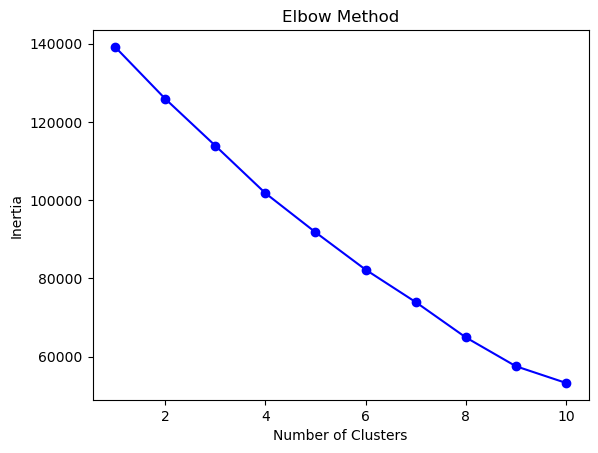

In [8]:
plt.plot(df_elbow['num_clusters'], df_elbow['inertia_values'], 'bo-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()


In [9]:
inertia_values = []
num_clusters = list(range(1, 21))  
for num in num_clusters:
    kmeans_model = KMeans(n_clusters=num, random_state=1)
    kmeans_model.fit(features_scaled)
    inertia_values.append(kmeans_model.inertia_)

d:\Users\SeanPapworth\anaconda3\envs\PythonData\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\Users\SeanPapworth\anaconda3\envs\PythonData\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\Users\SeanPapworth\anaconda3\envs\PythonData\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\Users\SeanPapworth\anaconda3\envs\PythonData\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to su

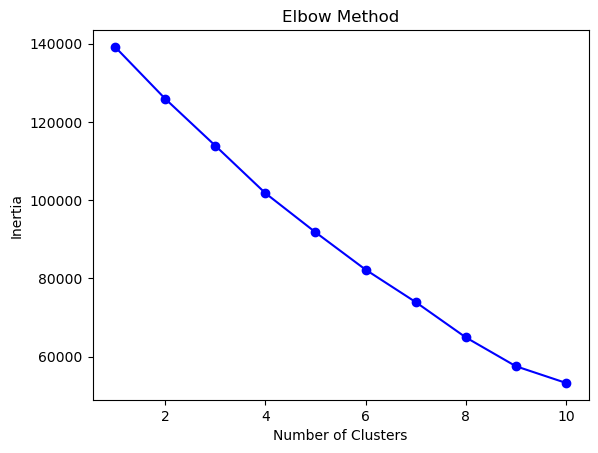

In [10]:
plt.plot(df_elbow['num_clusters'], df_elbow['inertia_values'], 'bo-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [11]:
# Select another set of features by removing name and year
features_noyear = Games_df.drop(['name', 'year'], axis=1)

In [12]:
features_scaled_without_year = scaler.fit_transform(features_noyear)

In [13]:
inertia_values = []
num_clusters = list(range(1, 21))  
for num in num_clusters:
    kmeans_model = KMeans(n_clusters=num, random_state=1)
    kmeans_model.fit(features_scaled_without_year)
    inertia_values.append(kmeans_model.inertia_)

d:\Users\SeanPapworth\anaconda3\envs\PythonData\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\Users\SeanPapworth\anaconda3\envs\PythonData\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\Users\SeanPapworth\anaconda3\envs\PythonData\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\Users\SeanPapworth\anaconda3\envs\PythonData\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to su

In [14]:
# Define a DataFrame to hold the values for number of clusters and the corresponding inertia again
elbow_data2 = {"num_clusters": num_clusters, "inertia_values": inertia_values}
df_elbow2 = pd.DataFrame(elbow_data2)

# Review the DataFrame
df_elbow2.head(20)

,num_clusters,inertia_values
0,1,127589.000000
1,2,114543.272337
2,3,102531.901607
3,4,91056.670992
4,5,81102.356900
5,6,73804.322957
6,7,63133.021263
7,8,55414.879388
8,9,48625.961267
9,10,42388.483677


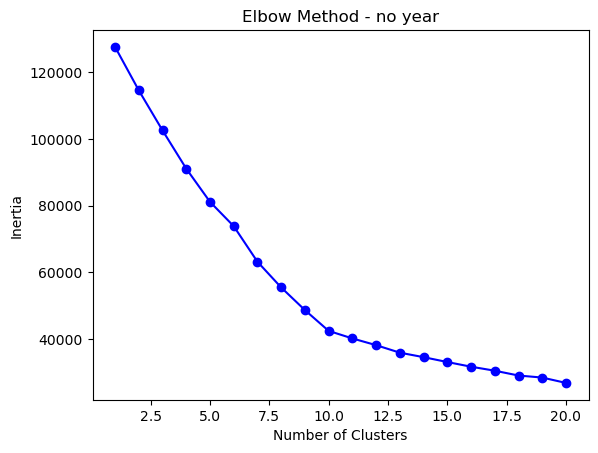

In [15]:
plt.plot(df_elbow2['num_clusters'], df_elbow2['inertia_values'], 'bo-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method - no year')
plt.show()

In [16]:
# Initialize KMeans
kmeans_model = KMeans(n_clusters=9, random_state=1)

# Fit the model
kmeans_model.fit(features_scaled)

# Get the cluster assignments for each data point
cluster_assignments = kmeans_model.labels_

# Add these cluster assignments back to your DataFrame for further analysis
Games_df['Cluster'] = cluster_assignments

Games_df.head(10)


d:\Users\SeanPapworth\anaconda3\envs\PythonData\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,name,year,rating,votes,Action,Adventure,Comedy,Crime,Family,Fantasy,Mystery,Sci-Fi,Thriller,Cluster
0,Spider-Man,2018.0,9.2,20759.0,True,True,False,False,False,True,False,False,False,4
1,Red Dead Redemption II,2018.0,9.7,35703.0,True,True,False,True,False,False,False,False,False,4
2,Grand Theft Auto V,2013.0,9.5,59986.0,True,False,False,True,False,False,False,False,False,4
3,God of War,2018.0,9.6,26118.0,True,True,False,False,False,False,False,False,False,4
4,Uncharted 4: A Thief's End,2016.0,9.5,28722.0,True,True,False,False,False,False,False,False,False,4
5,The Last of Us: Part II,2020.0,8.5,30460.0,True,True,False,False,False,False,False,False,False,4
6,Horizon Forbidden West,2022.0,9.2,2979.0,True,True,False,False,False,False,True,False,False,6
7,The Last of Us,2013.0,9.7,60590.0,True,True,False,False,False,False,False,False,False,4
8,Detroit: Become Human,2018.0,9.2,16907.0,True,True,False,False,False,False,False,False,False,4
9,Death Stranding,2019.0,8.8,8136.0,True,True,False,False,False,False,False,False,False,1


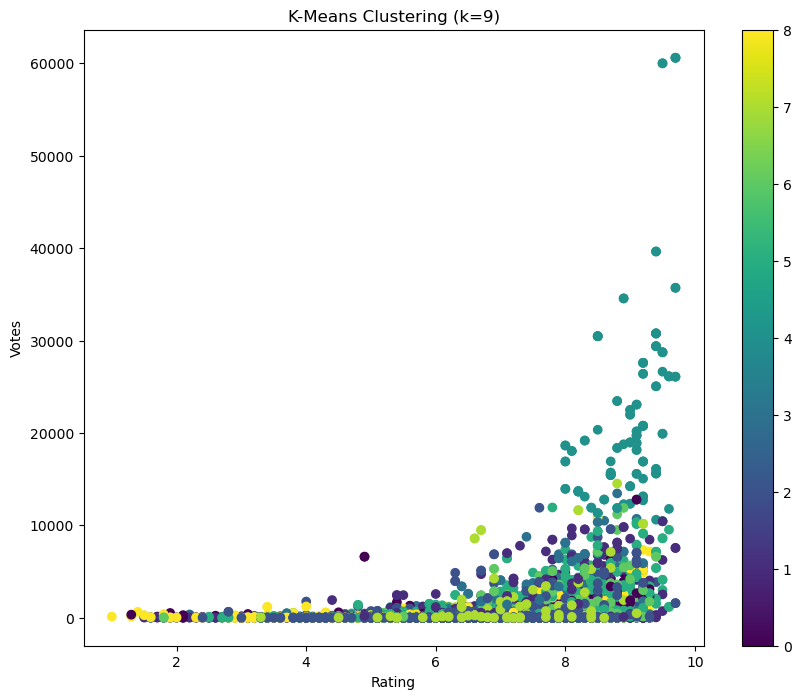

In [17]:
plt.figure(figsize=(10, 8))
scatter = plt.scatter(Games_df['rating'], Games_df['votes'], c=Games_df['Cluster'], cmap='viridis')
plt.xlabel('Rating')
plt.ylabel('Votes')
plt.title('K-Means Clustering (k=9)')
plt.colorbar(scatter)
plt.show()

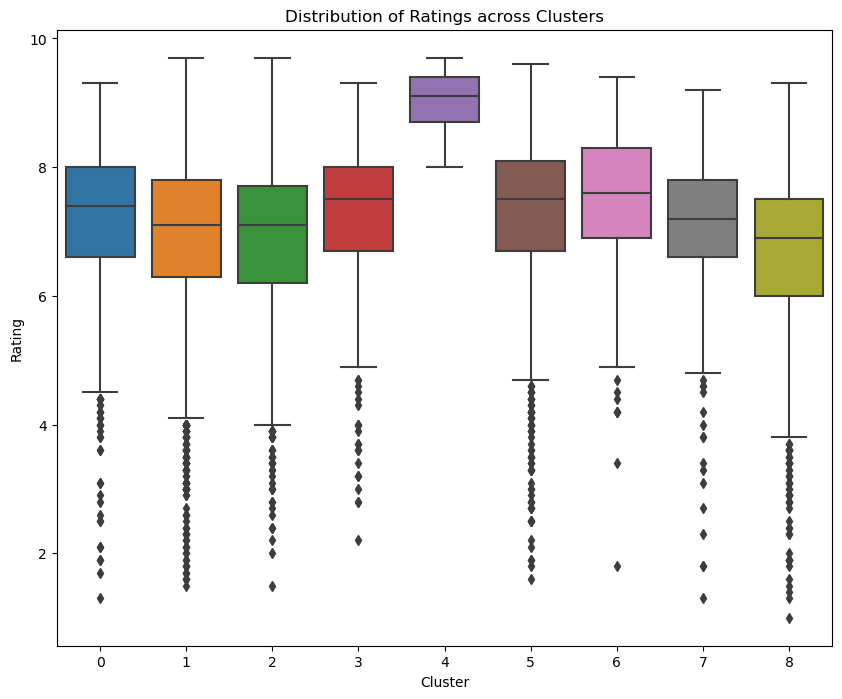

In [20]:
#  box plots to compare the distribution of ratings across the clusters

import seaborn as sns

plt.figure(figsize=(10, 8))
sns.boxplot(x='Cluster', y='rating', data=Games_df)
plt.title('Distribution of Ratings across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Rating')
plt.show()


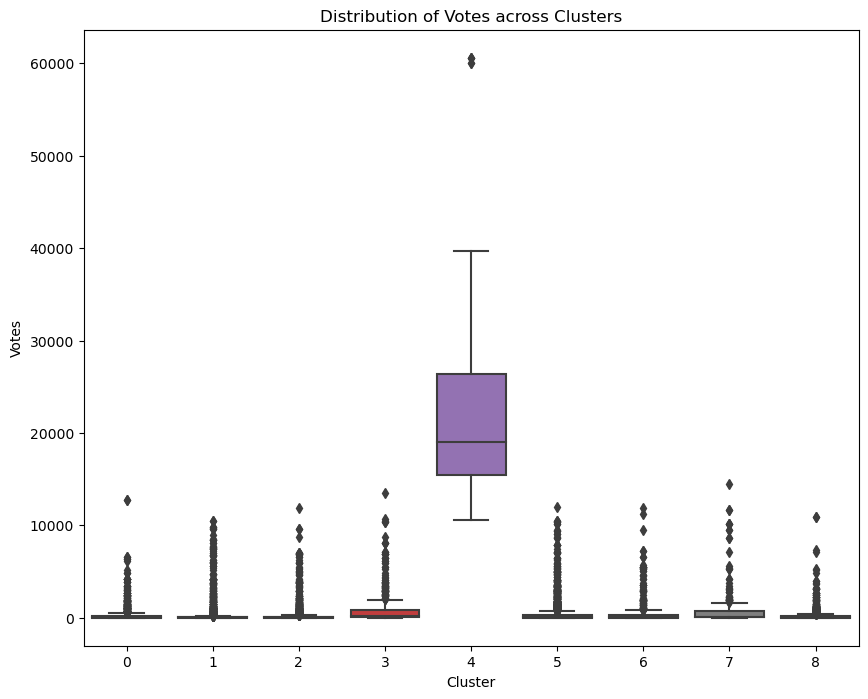

In [21]:
#  box plots to compare the distribution of votes across the clusters

plt.figure(figsize=(10, 8))
sns.boxplot(x='Cluster', y='votes', data=Games_df)
plt.title('Distribution of Votes across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Votes')
plt.show()


In [26]:
# This function calculates the mean of each genre column in a given cluster dataframe
def compute_genre_proportions(cluster_df):
    proportions = cluster_df.iloc[:, 4:-1].mean()
    return proportions

In [27]:
# apply this function to each cluster and gather the results in a new dataframe

genre_proportions = pd.DataFrame()
for cluster in range(9):
    cluster_df = Games_df[Games_df['Cluster'] == cluster]
    proportions = compute_genre_proportions(cluster_df)
    genre_proportions = genre_proportions.append(proportions, ignore_index=True)


C:\Users\Sean Papworth\AppData\Local\Temp\ipykernel_7420\3727156652.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  genre_proportions = genre_proportions.append(proportions, ignore_index=True)
C:\Users\Sean Papworth\AppData\Local\Temp\ipykernel_7420\3727156652.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  genre_proportions = genre_proportions.append(proportions, ignore_index=True)
C:\Users\Sean Papworth\AppData\Local\Temp\ipykernel_7420\3727156652.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  genre_proportions = genre_proportions.append(proportions, ignore_index=True)
C:\Users\Sean Papworth\AppData\Local\Temp\ipykernel_7420\3727156652.py:7: FutureWarning: The frame.append method is deprecated and will be rem

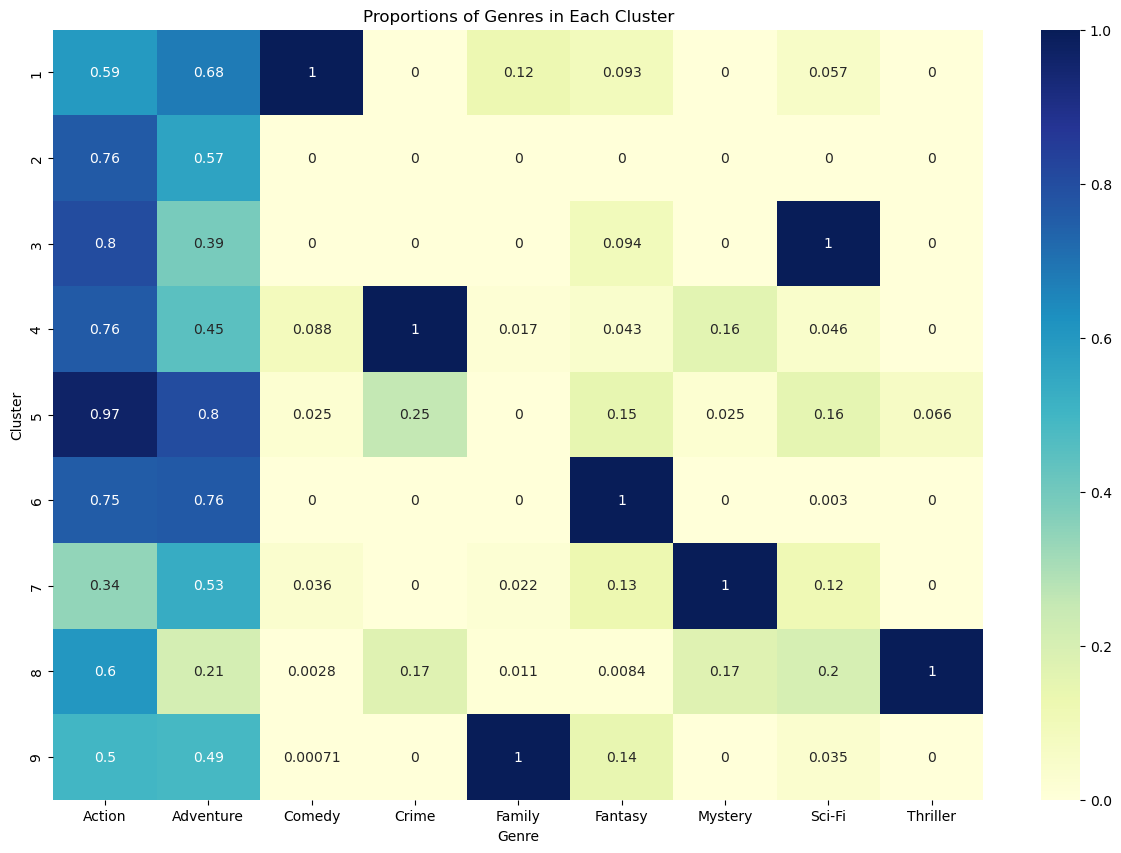

In [28]:
# plot this information in a bar plot

plt.figure(figsize=(15, 10))
ax = sns.heatmap(data=genre_proportions, annot=True, cmap="YlGnBu")
ax.set_yticklabels(range(1, 10))  # This line changes the y-axis labels
plt.title('Proportions of Genres in Each Cluster')
plt.xlabel('Genre')
plt.ylabel('Cluster')
plt.show()

